# Obligatorisk innlevering 2 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi oppsigelser ved en arbeidsplass basert på en rekke variabler som f.eks alder, kjønn, utdannelse, lønn, osv.

In [395]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [397]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")


### Preprosessering:
For å forenkle håndteringen av kategoriske data har jeg her skrevet noe kode som gjør om strenger til intergers

Følgende kolonner er formatert som *object* og inneholder kategoriske variabler i form av strenger

In [399]:
kolonner_obj = df.select_dtypes(include=['object']).columns
print(kolonner_obj)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


I koden under omformer jeg strengene til integers og gir dere "nøkkelen" til å konvertere det tilbake igjen

In [401]:
for i in kolonner_obj:
    print("-----------")
    print(i)
    print("-----------")
    for num, j in enumerate(list(df[i].unique())):
        print("{} = {}".format(j,num))
        df[i].loc[df[i]==j] = num
    df[i] = pd.to_numeric(df[i])

-----------
BusinessTravel
-----------
Travel_Frequently = 0
Travel_Rarely = 1
Non-Travel = 2
-----------
Department
-----------
Research & Development = 0
Sales = 1
Human Resources = 2
-----------
EducationField
-----------
Medical = 0
Other = 1
Marketing = 2
Life Sciences = 3
Technical Degree = 4
Human Resources = 5
-----------
Gender
-----------
Male = 0
Female = 1
-----------
JobRole
-----------
Laboratory Technician = 0
Sales Representative = 1
Sales Executive = 2
Healthcare Representative = 3
Manager = 4
Manufacturing Director = 5
Research Scientist = 6
Human Resources = 7
Research Director = 8
-----------
MaritalStatus
-----------
Married = 0
Divorced = 1
Single = 2
-----------
Over18
-----------
Y = 0
-----------
OverTime
-----------
Yes = 0
No = 1


C:\Users\alami\AppData\Local\Temp\ipykernel_26160\3482823818.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[i].loc[df[i]==j] = num
C:\Users\alami\AppData\Local\Temp\ipykernel_26160\3482823818.py:7: SettingWithCopyWarning: 
A value is

I outputen fra koden nedenfor viser datatypen til de forskjellige kolonnene, som nå etter preprosesseringen bare består av integers (int64). 

In [94]:
print(df.dtypes)

id                          int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [403]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

In [876]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=round((0.15 / 0.75),1), random_state=42)

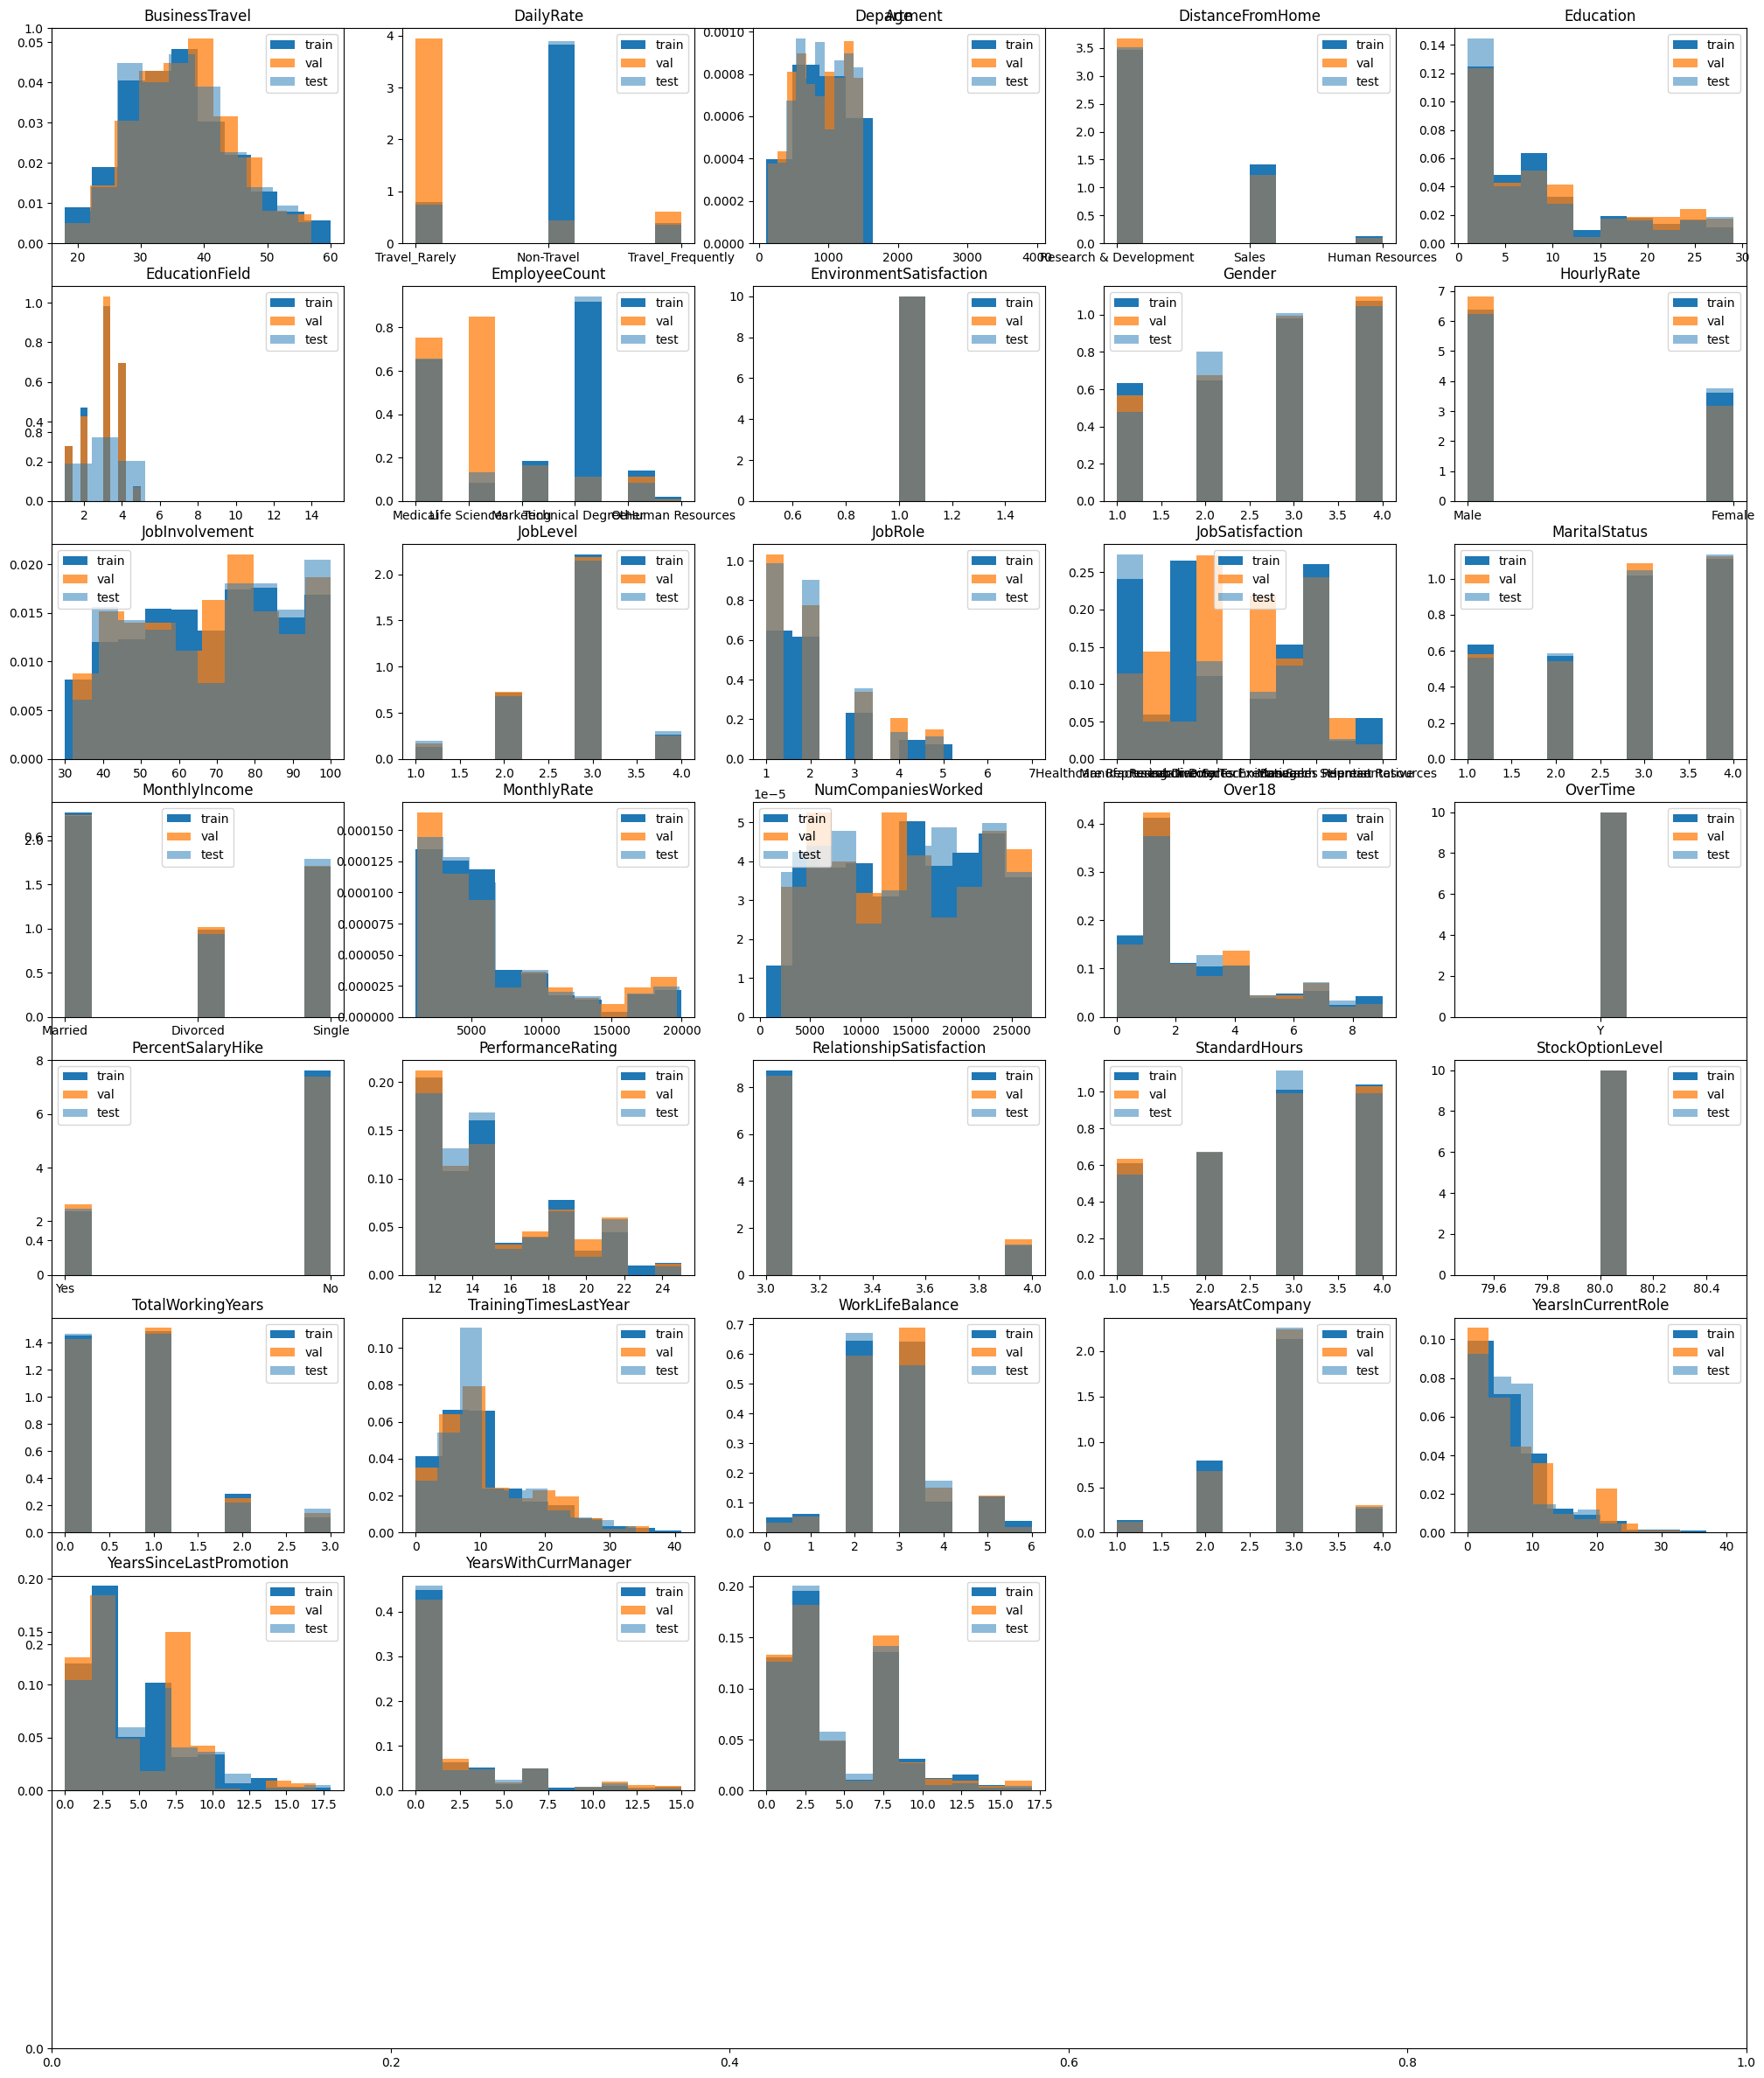

In [638]:
plt.figure(figsize = (25,30))
for i in range(X_train.shape[1]):
    plt.title(X_train.columns[i])
    plt.subplot(8,5,i+1)
    plt.hist(X_train.iloc[:,i], density = True, color = "C0", label = "train")
    plt.hist(X_val.iloc[:,i], density = True, color = "C1", alpha = 0.75, label = "val")
    plt.hist(X_test.iloc[:,i], density = True, color = "C0", alpha = 0.50,label = "test")
    plt.legend()
plt.show()

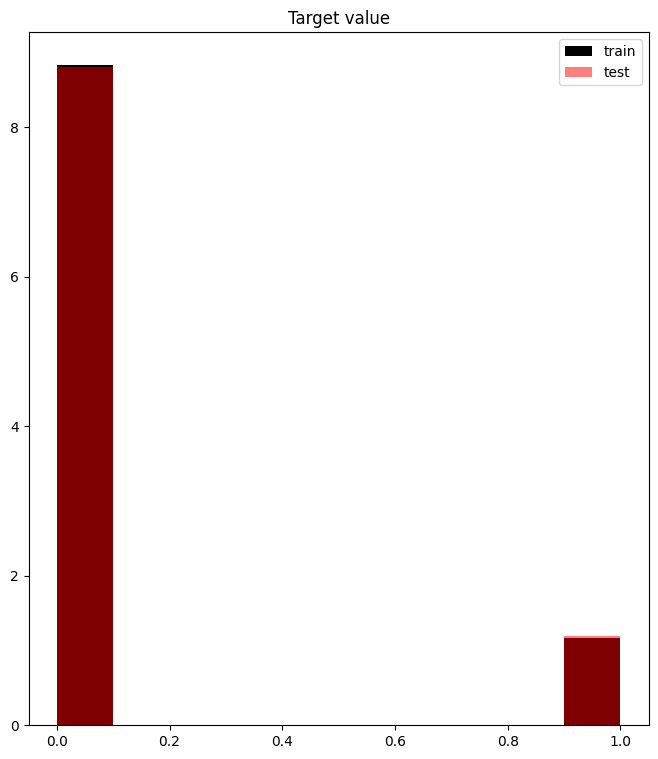

In [902]:
#TODO: visualiser y_train og y_test i et histogram
import matplotlib.pyplot as plt
plt.figure(figsize= (8,9))
plt.title("Target value")
plt.hist(y_train, density = True, color="black", label = "train")
#plt.hist(y_val , density = True, color = "C1", alpha = 0.75, label = "val")
plt.hist(y_test, density = True, color = "red", alpha = 0.5, label="test")
plt.legend()
plt.show()


In [912]:
# en histogramsplot med to søyler, hvor x-aksen viser verdiene 0 og 1.>*
# Dette tyder på at dataene har binær utfall, noe som er en typisk klassifiserings oppgave. *
#regresjon vil ha kontinuerlige verdier på x-aksen. 
#

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


In [740]:
#TODO: repeterte kryssvalideringer for to modeller
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.datasets import load_wine
from scipy import stats

In [742]:
rkf = RepeatedKFold(n_splits = 5, n_repeats = 10, random_state = 42)
f1_score_log_reg = []
for i, (train_index, val_index) in enumerate(rkf.split(X_train)):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    logistic_reg = LogisticRegression(solver = "saga", max_iter = 10000)
    logistic_reg.fit(X_train_cv, y_train_cv)
    
    y_val_hat = logistic_reg.predict_proba(X_val_cv)[:,1]
    score = f1_score(y_val_cv,(y_val_hat> 0.5)*1, average = 'weighted').round(2)
    f1_score_log_reg.append(score)
    

In [744]:

f1_score_mlp =[]
for i, (train_index, val_index) in enumerate(rkf.split(X_train)):
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[val_index]

    rfc = MLPClassifier(random_state=1, max_iter=10000, solver="sgd", learning_rate = "adaptive")
    mlp.fit(X_train_cv, y_train_cv)

    y_val_hat = mlp.predict_proba(X_val_cv)[:,1]
    score = f1_score(y_val_cv,(y_val_hat> 0.5)*1, average = 'micro').round(2)
    f1_score_mlp.append(score)

In [746]:
log_reg_mean = np.array(f1_score_log_reg).mean().round(3)
log_reg_std = np.array(f1_score_log_reg).std().round(3)
print(r" Gjennomsnittlig Logistic Regression {} ± {}".format(log_reg_mean, log_reg_std))

Logistic Regression 0.83 ± 0.021


In [748]:
mlp_mean = np.array(f1_score_mlp).mean().round(3)
mlp_std = np.array(f1_score_mlp).std().round(3)
print(r" Gjennomsnitlig mlp  = {} ± {}".format(mlp_mean, mlp_std))

mlp  = 0.884 ± 0.014


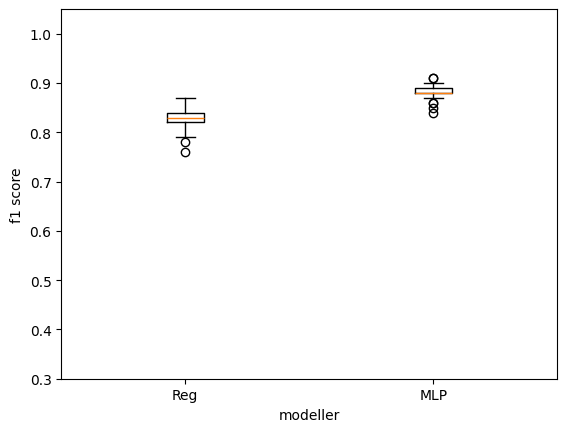

In [750]:
plt.boxplot([np.asarray(f1_score_log_reg), np.asarray(f1_score_mlp)])
plt.ylim(0.3, 1.05)
plt.xticks([1,2], ["Reg", "MLP"])
plt.ylabel("f1 score")
plt.xlabel("modeller")
plt.show()

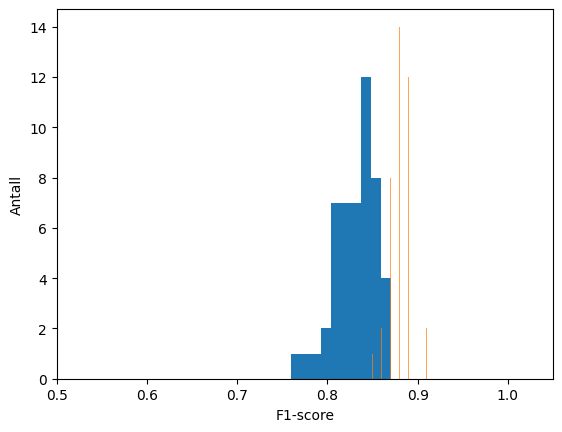

In [752]:
plt.hist(np.asarray(f1_score_log_reg))
plt.hist(np.asarray(f1_score_mlp), bins=90, alpha=0.7)
plt.xlim(0.5,1.05)
plt.xlabel("F1-score")
plt.ylabel("Antall")
plt.show()

In [864]:

t_stats, p_values = ttest_ind(f1_score_log_reg, f1_score_mlp)

print(f"T-test statistikk: {t_stats:.3f}")
print(f"P-verdi: {p_values:.3f}")




T-test statistikk: -14.686
P-verdi: 0.000


In [634]:
mlp = MLPClassifier(random_state=1, max_iter=10000,solver="sgd",learning_rate="adaptive")
mlp.fit(X_train, y_train)
y_test_hat = mlp.predict_proba(X_test)[:,1]
mlp_test_score = f1_score(y_test,(y_test_hat>0.5)*1,average='weighted').round(3)

logreg = LogisticRegression(solver='saga',max_iter=10000)
logreg.fit(X_train, y_train)
y_test_hat = logreg.predict_proba(X_test)[:,1]
logreg_test_score = f1_score(y_test,(y_test_hat>0.5)*1,average='weighted').round(3)

In [636]:
print("MLP test score", mlp_test_score)
print("logistic regression test scores ", logreg_test_score)


MLP test score 0.812
logistic regression test scores  0.812


**Svar:**

*< nøyaktighet av begge modellene er likt, noe som betyr at de gjør et like høyt antall korrekte prediksjoner på testsettet >*
*<logistisk reg : mean : 83% og standardsavvik: ± 0.021 >*
*<MLPClassifier : mean : 88.4% og standardsavvik: ± 0.014 >*
*< MLPClassifier har en høyre gjennomsnitlig ytelse enn sammenlignet med logistisk regression. Det betyr at MPLClassifier presterer bedre enn log regression>*
*<I tillegg, MLPClassifier har lavere standardsavvik enn logistisk regresjon noe som indikerer at ytelsen av MLP er mer stabilt. >*

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

In [710]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, make_scorer, confusion_matrix
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold


In [712]:

pipeline_lr = Pipeline(steps=[('smote', SMOTE(random_state=42)),
                              ('scaler', StandardScaler()),
                              ('model', LogisticRegression(max_iter=5000, random_state=42, solver = 'lbfgs'))])
pipeline_rf = Pipeline(steps=[('smote', SMOTE(random_state=42)), 
                              ('model', RandomForestClassifier(random_state=42))])

In [714]:
def smote_cross_val_score(model, X, y, cv, scoring):
    scores = []
    for train_idx, val_idx in cv.split(X, y):
        X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
        
        # Bruke SMOTE kunn på treningsdata
        smote = SMOTE(random_state=42)
        X_train_cv, y_train_cv = smote.fit_resample(X_train_cv, y_train_cv)
        model_clone = clone(model)
        model_clone.fit(X_train_cv, y_train_cv)
        y_pred = model_clone.predict(X_val_cv)

        score = scoring(y_val_cv, y_pred)
        scores.append(score)
    
    return np.array(scores)

# repeated kryssvalidering
rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

def f1_scorer(y_true, y_pred):
    return f1_score(y_true, y_pred)
def accuracy_scorer(y_true, y_pred):
    return accuracy_score(y_true, y_pred)


In [736]:
# kryssvalidering for Logistic Regression
f1_scores_log_reg = smote_cross_val_score(pipeline_lr, X_train, y_train, rkf, f1_scorer)
accuracy_scores_log_reg = smote_cross_val_score(pipeline_lr, X_train, y_train, rkf, accuracy_scorer)

# kryssvalidering for Random Forest
f1_scores_ran_forest = smote_cross_val_score(pipeline_rf, X_train, y_train, rkf, f1_scorer)
accuracy_scores_ran_forest = smote_cross_val_score(pipeline_rf, X_train, y_train, rkf, accuracy_scorer)

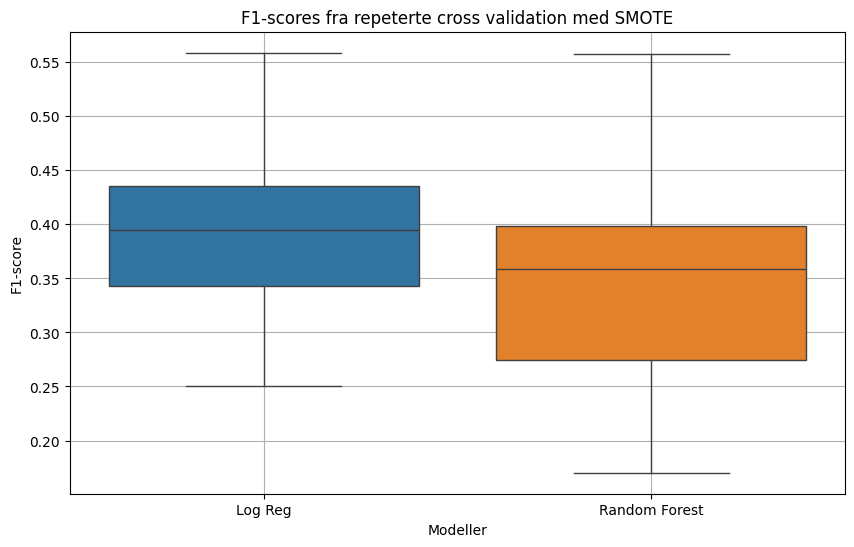

In [722]:
f1_scores_df = pd.DataFrame({
    'Log Reg': f1_scores_log_reg,
    'Random Forest': f1_scores_ran_forest })
# Visualisering i plotboks
plt.figure(figsize=(10, 6))
sns.boxplot(data=f1_scores_df)
plt.title('F1-scores fra repeterte cross validation med SMOTE')
plt.xlabel("Modeller")
plt.ylabel('F1-score')
plt.grid()
plt.show()


In [734]:
#gjennomsnitt
mean_f1_logistic_reg = np.mean(f1_scores_lr)
mean_f1_random_forest = np.mean(f1_scores_rf)

#nøyaktighet
mean_accuracy_logistic_reg = np.mean(accuracy_scores_lr)
mean_accuracy_random_forest = np.mean(accuracy_scores_rf)

print(f"Gjennomsnittlig F1-score for Logistic Regression: {mean_f1_logistic_reg:.3f}") 
print(f"Gjennomsnittlig F1-score for Random Forest: {mean_f1_random_forest:.3f}")
print('\n')
print(f"Gjennomsnittlig nøyaktighet for logistic regression: {mean_accuracy_logistic_reg :.3f}")
print(f"Gjennomsnittlig nøyaktighet for Random Forest: {mean_accuracy_random_forest :.3f}")

Gjennomsnittlig F1-score for Logistic Regression: 0.392
Gjennomsnittlig F1-score for Random Forest: 0.344


Gjennomsnittlig nøyaktighet for logistic regression: 0.835
Gjennomsnittlig nøyaktighet for Random Forest: 0.878


In [738]:
# Utfør to-sidig T-test
t_stat, p_value = ttest_ind(f1_scores_log_reg, f1_scores_ran_forest)

print(f"T-test statistikk: {t_stat:.3f}")
print(f"P-verdi: {p_value:.3f}")

T-test statistikk: 2.918
P-verdi: 0.004


**Svar:**

*< Positivt T-test verdier viser at logisktisk regressor har en høyere gjennomsnitt f1-score enn MLP. 
>*

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [770]:
#TODO: Tren den beste modellen fra 2.2 og 2.3 på alle treningsdataene og test på testdataene
# Definer den beste modellen (RandomForestClassifier fra tidligere oppgave)
best_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None, min_samples_split=2)
best_model.fit(X_train, y_train)

In [774]:
# Gjør prediksjoner på testsettet
y_pred = best_model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [792]:

from sklearn.metrics import confusion_matrix,recall_score,precision_score, classification_report, roc_curve, roc_auc_score
# Beregn de andre ytelsesmålene
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Sensitivitet (Recall): {recall:.3f}")
print(f"Spesifisitet: {specificity:.3f}")
print(f"Presisjon: {precision:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"Nøyaktighet (Accuracy): {accuracy:.3f}")


Sensitivitet (Recall): 0.056
Spesifisitet: 0.997
Presisjon: 0.750
F1-score: 0.103
Nøyaktighet (Accuracy): 0.876


#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [840]:
#TODO: Gjør kjønnsbasert analyse på testdataene
X['Gender'] = np.random.choice(['Male' , 'Female'], size = X.shape[0])


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

X_test.head()
print(X_test['Gender'].value_counts())

Gender
Female    219
Male      201
Name: count, dtype: int64


In [818]:
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['Gender'])) 
X_test_scaled = scaler.transform(X_test.drop(columns=['Gender']))

In [844]:
model = LogisticRegression(max_iter=5000, random_state=42, solver='lbfgs')
model.fit(X_train_scaled, y_train)
X_test_male = X_test[X_test['Gender'] == 'Male'].drop(columns=['Gender']) 
y_test_male = y_test[X_test['Gender'] == 'Male']
X_test_female = X_test[X_test['Gender'] == 'Female'].drop(columns=['Gender']) 
y_test_female = y_test[X_test['Gender'] == 'Female']

In [858]:
y_pred_male = model.predict(scaler.transform(X_test_male))
y_pred_female = model.predict(scaler.transform(X_test_female))

#menn
tn_male, fp_male, fn_male, tp_male = confusion_matrix(y_test_male, y_pred_male).ravel() 
specificity_male = tn_male / (tn_male + fp_male) 
precision_male = precision_score(y_test_male, y_pred_male) 
recall_male = recall_score(y_test_male, y_pred_male)
#kvinner
tn_female, fp_female, fn_female, tp_female = confusion_matrix(y_test_female, y_pred_female).ravel() 
specificity_female = tn_female / (tn_female + fp_female) 
precision_female = precision_score(y_test_female, y_pred_female) 
recall_female = recall_score(y_test_female, y_pred_female) 


print(f"Ytelse for Menn:") 
print(f"Sensitivitet (Recall): {recall_male:.3f}") 
print(f"Spesifisitet: {specificity_male:.3f}") 
print(f"Presisjon: {precision_male:.3f}") 
print("\n")
print(f"Ytelse for kvinner:") 
print(f"Sensitivitet (Recall): {recall_female:.3f}") 
print(f"Spesifisitet: {specificity_female:.3f}") 
print(f"Presisjon: {precision_female:.3f}") 


Ytelse for Menn:
Sensitivitet (Recall): 0.130
Spesifisitet: 0.978
Presisjon: 0.429


Ytelse for kvinner:
Sensitivitet (Recall): 0.296
Spesifisitet: 0.974
Presisjon: 0.615


In [870]:

# Basert på de ytelsesmålene, viser det seg at modellen presterer ulikt. 
#Det identifiserer bare 13% av faktiske + tilfellene for menn mot 29.6% for kvinner.
# Samme gjelder for spesifisitet og presisjonen. Årsaken er i datafordeling i treningsdataene. 
# tiltak: datasettbalansering, må sørges for at treningsdataene er balansert med hensyn til Gender. 

Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i pull requestet

In [915]:
!pip freeze > requirements.txt